# Hidden Moments
A look at sample maxima and how we can use in sample data make inferences about parts of the distribution which we have not yet observed.

This is closely related to **The Lucretius Problem**: Assuming that the worst event which has happened is the worst event which can happen

Source of Inspiration:
* *What You See and What You Don’t See: The Hidden Moments of a Probability Distribution*
    * An April 2020 Draft paper by Nassim Taleb
    * Link: [arxiv.org](https://arxiv.org/abs/2004.05894)

### Context

Aide-Memoire
* Hidden Moments
    * Hidden 0th Moment: 
        * **Hidden Probability**
        * Probability of observing a value greater than an observed sample max
        * Both gaussian and power law distributions 
    * Hidden 1st Moment: Magnitude of the mean above the
        * **Hidden Mean**
        * The part of the true mean which lies above an observed sample max
    
For detail see the paper linked above.

### Gaussian Domain

As per equation (4) of the paper, the **Hidden Probability** for a gaussian is as follows:
$$
\mathbb{E}[\mu_{K,0}] = \frac{{1 - 2^{-n}}}{{n+1}}
$$

##### From $n=1$ to $n=100$

Let's plot this:

In [6]:
def hidden_p(n):
    
    return (1 - 2**(-n)) / (n+1)

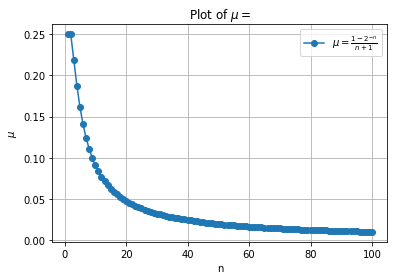

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def mu(n):
    return (1 - 2**(-n)) / (n + 1)

# Generate values for n
n_values = np.arange(1, 101)  # Use np.arange to get integers from 1 to 100

# Calculate corresponding mu values
mu_values = pd.Index(n_values).map(mu)
mu_values = np.array(mu_values)

# Plot the function with markers
plt.plot(n_values, mu_values, marker='o', linestyle='-', label=r'$\mu = \frac{{1 - 2^{-n}}}{{n+1}}$')

# Labeling and Title
plt.xlabel('n')
plt.ylabel(r'$\mu$')
plt.title('Plot of $\mu = \frac{{1 - 2^{-n}}}{{n+1}}$')
plt.legend()
plt.grid(True)
plt.show()


##### From $n=1$ to $n=20$

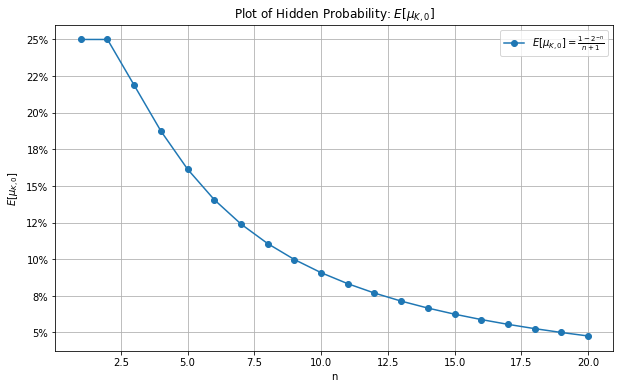

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Define the function
def mu(n):
    return (1 - 2**(-n)) / (n + 1)

# Generate values for n
n_values = np.arange(1, 21)

# Calculate corresponding mu values using NumPy directly
mu_values = pd.Index(n_values).map(mu)
mu_values = np.array(mu_values)

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Plot the function with markers
plt.plot(n_values, mu_values, marker='o', linestyle='-', label=r'$E[\mu_{K,0}] = \frac{{1 - 2^{-n}}}{{n+1}}$')

# Labeling and Title
plt.xlabel('n')
plt.ylabel(r'$E[\mu_{K,0}]$')
plt.title('Plot of Hidden Probability: $E[\mu_{K,0}]$')
#plt.title('Plot of $E[\mu_{K,0}] = \frac{{1 - 2^{-n}}}{{n+1}}$')

# Convert y-labels to percentages rounded to the nearest whole number
def percentage_formatter(x, pos):
    return f'{round(x*100)}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.legend()
plt.grid(True)
plt.show()


Compare with $1/n$ approximation:

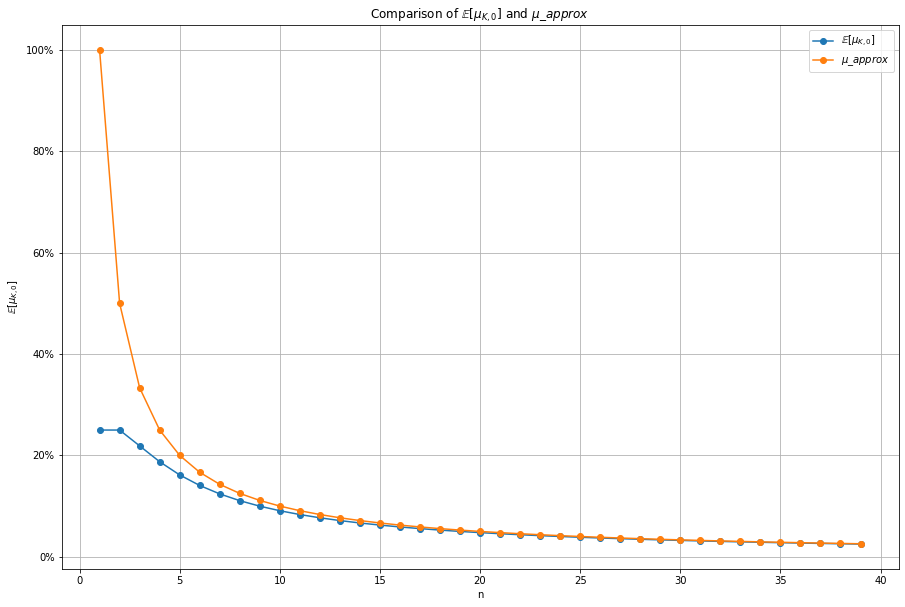

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define the original function
def mu(n):
    return (1 - 2**(-n)) / (n + 1)

# Define the approximation function
def mu_approx(n):
    return 1 / n

# Generate values for n
n_values = np.arange(1, 40)

# Calculate corresponding mu values using NumPy directly for both functions
mu_values = pd.Index(n_values).map(mu)
mu_values = np.array(mu_values)

mu_approx_values = pd.Index(n_values).map(mu_approx)
mu_approx_values = np.array(mu_approx_values)

# Set a larger figure size
plt.figure(figsize=(15, 10))

# Plot the exact function with markers
plt.plot(n_values, mu_values, marker='o', linestyle='-', label=r'$\mathbb{E}[\mu_{K,0}]$')

# Plot the approximation function with markers
plt.plot(n_values, mu_approx_values, marker='o', linestyle='-', label=r'$\mu\_approx$')

# Labeling and Title
plt.xlabel('n')
plt.ylabel(r'$\mathbb{E}[\mu_{K,0}]$')
plt.title('Comparison of $\mathbb{E}[\mu_{K,0}]$ and $\mu\_approx}$')

# Convert y-labels to percentages rounded to the nearest whole number
def percentage_formatter(x, pos):
    return f'{round(x*100)}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.legend()
plt.grid(True)
plt.show()


Numerical Table:

In [107]:
d = {
    'mu' : mu_values,
    'mu_approx' : mu_approx_values,
    }

df = pd.DataFrame(d, index=n_values)
df.index.rename('sample_size', inplace=True)
df = df.round(2)

df['delta'] = df.eval('mu_approx-mu')

df

,mu,mu_approx,delta
sample_size,,,
1,0.25,1.00,0.75
2,0.25,0.50,0.25
3,0.22,0.33,0.11
4,0.19,0.25,0.06
5,0.16,0.20,0.04
6,0.14,0.17,0.03
7,0.12,0.14,0.02
8,0.11,0.12,0.01
9,0.10,0.11,0.01


Plot with delta:

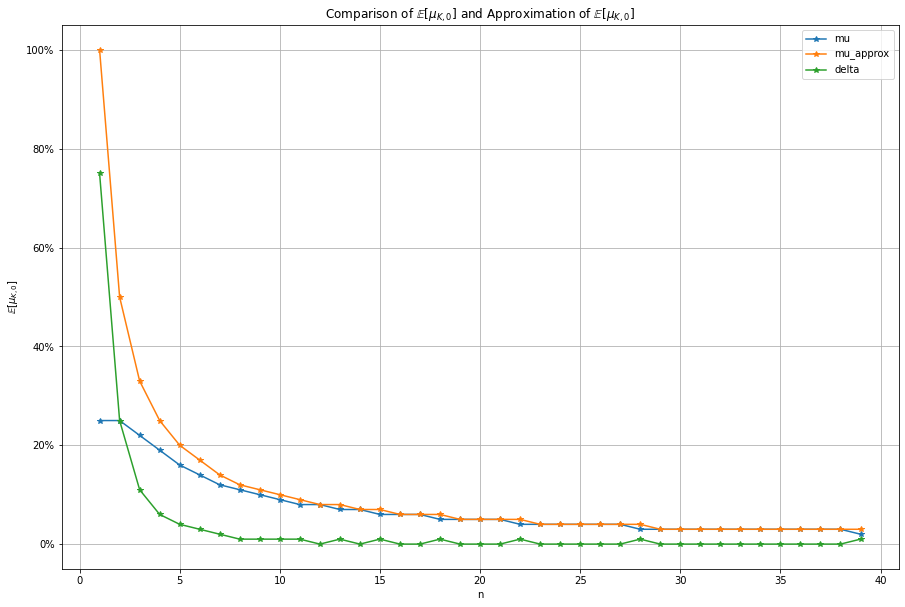

In [105]:
kwargs = {'figsize' : (15, 10),
          'marker' : '*',
          'xlabel' : 'n',
          'ylabel' : r'$\mathbb{E}[\mu_{K,0}]$',
          'title' : 'Comparison of $\mathbb{E}[\mu_{K,0}]$ and Approximation of $\mathbb{E}[\mu_{K,0}]$',}

# Set a larger figure size
ax = df.plot(**kwargs)

# Convert y-labels to percentages rounded to the nearest whole number
def percentage_formatter(x, pos):
    return f'{round(x*100)}%'

from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.legend()
plt.grid(True)
plt.show()

### Applications

Application:
* The underlying variable x can represent any gaussian process
* e.g. diameter of a bolts on a production line
* Just plug in whatever application you want to use and the conclusions are the same

### **Conclusions**

First Moment:
* For $n>20$ the probability of exceeding the sample max is $p < 5\%$

Second Moment:
* What's the expectation 

### Todo

* With Hidden Probability
    * Tidy the work so far
* With Hidden Mean
    * Numerically show how fast hidden mean converges 
    * See SCOFT book 1 for method
* Work on the applied example
* Sense Check:
    * Does it make sense that $\mu = 25\%$ for both n=1 and n=2?
        * n=2 should have lower mu? 
        * Is this an artefact of the approximation in deriving mu(n)?
    * Is it right that the 1/n approximation only converges for n greater than about 7 (and doesn't match for n=1 and 2)

### Power Law Domain